In [1]:
from BorutaShap import BorutaShap, load_data
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

X, y = load_data(data_type='classification')
X.head()

C:\Users\Retro\anaconda3\envs\boruta_test1\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [2]:
model = RandomForestClassifier(class_weight = 'balanced')

# no model selected default is Random Forest, if classification is False it is a Regression problem
Feature_Selector = BorutaShap(model=model,
                              importance_measure='shap',
                              classification=True)

Feature_Selector.fit(X=X, y=y, n_trials=10, random_state=0)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:11<00:00,  1.14s/it]

19 attributes confirmed important: ['mean area', 'worst radius', 'worst concave points', 'radius error', 'mean concave points', 'perimeter error', 'worst compactness', 'mean perimeter', 'mean radius', 'worst texture', 'worst perimeter', 'area error', 'worst area', 'mean compactness', 'worst concavity', 'worst smoothness', 'mean concavity', 'concavity error', 'mean texture']
4 attributes confirmed unimportant: ['mean fractal dimension', 'texture error', 'fractal dimension error', 'smoothness error']
7 tentative attributes remains: ['compactness error', 'symmetry error', 'concave points error', 'worst fractal dimension', 'worst symmetry', 'mean smoothness', 'mean symmetry']


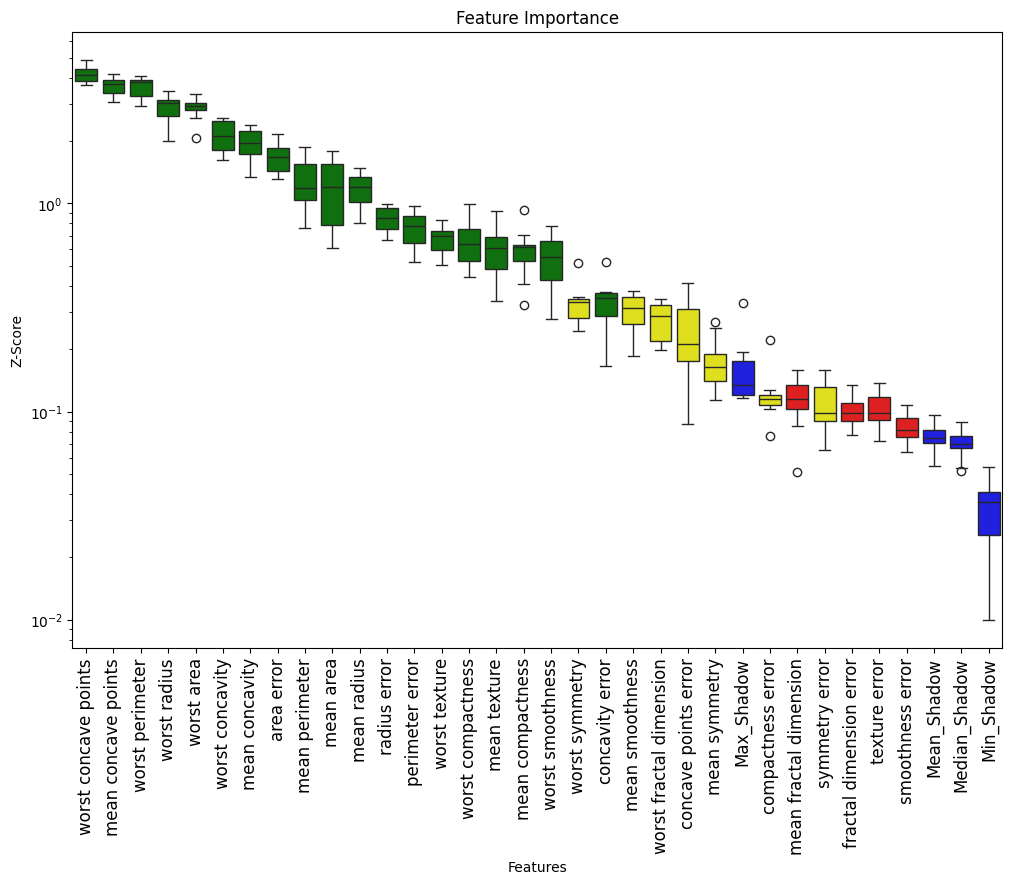

In [3]:
# Returns Boxplot of featuresn
Feature_Selector.plot(X_size=12, figsize=(12,8),
            y_scale='log', which_features='all')

In [4]:
# The scale pos weight factor should be equal to the scale_pos_weight = count(negative examples)/count(Positive examples)
# in this case as the classes are already equal we get one
model = XGBClassifier()

# no model selected default is Random Forest, if classification is False it is a Regression problem
Feature_Selector = BorutaShap(model=model,
                              importance_measure='shap',
                              classification=True)

Feature_Selector.fit(X=X, y=y, n_trials=100, random_state=0)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:36<00:00,  2.74it/s]

11 attributes confirmed important: ['mean concave points', 'compactness error', 'worst texture', 'worst radius', 'worst perimeter', 'worst concavity', 'worst smoothness', 'worst area', 'worst concave points', 'area error', 'mean texture']
19 attributes confirmed unimportant: ['symmetry error', 'mean area', 'worst symmetry', 'mean symmetry', 'radius error', 'fractal dimension error', 'mean fractal dimension', 'concave points error', 'perimeter error', 'worst fractal dimension', 'worst compactness', 'mean smoothness', 'mean perimeter', 'texture error', 'mean radius', 'mean compactness', 'mean concavity', 'smoothness error', 'concavity error']
0 tentative attributes remains: []


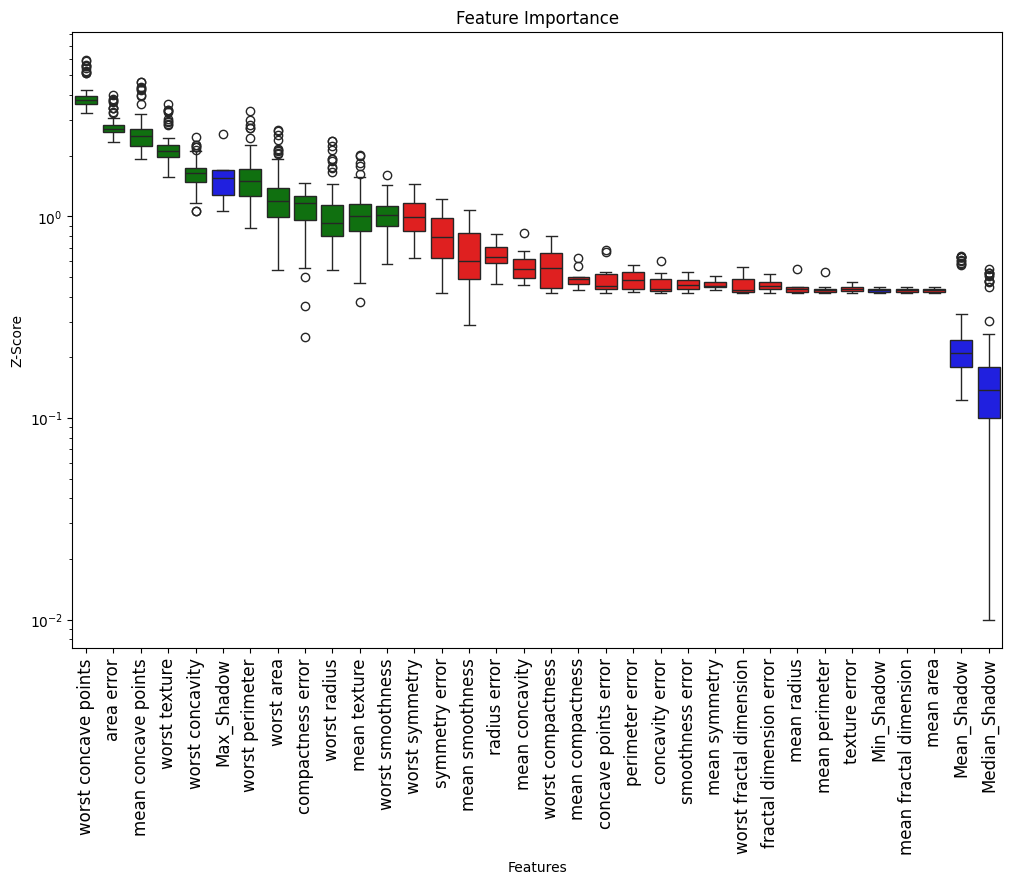

In [5]:
# Returns Boxplot of features
Feature_Selector.plot(X_size=12, figsize=(12,8),
            y_scale='log', which_features='all')


Type :  Tentative


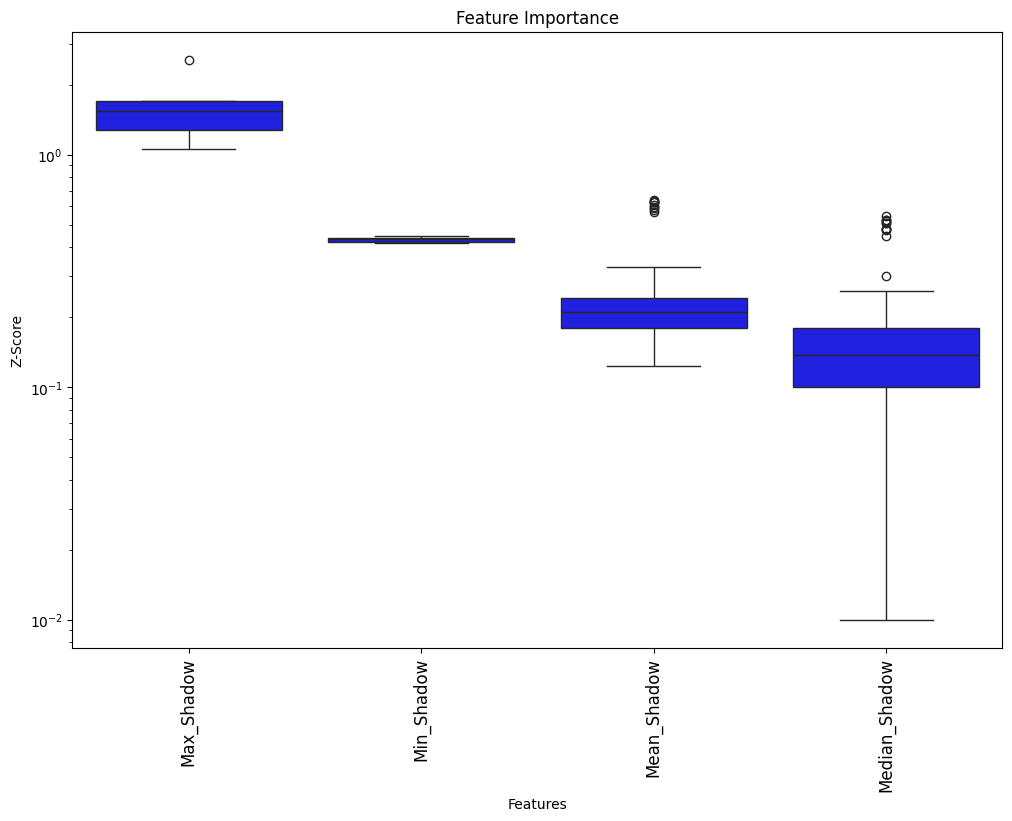

Type :  Rejected


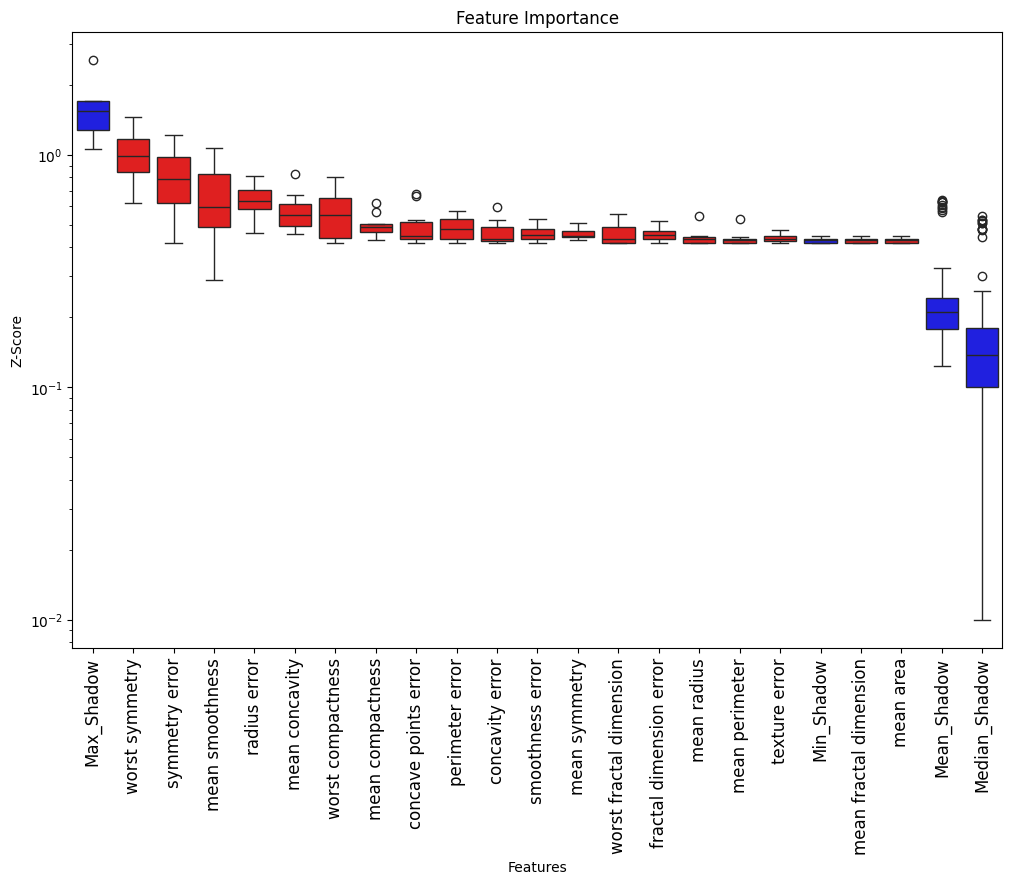

Type :  Accepted


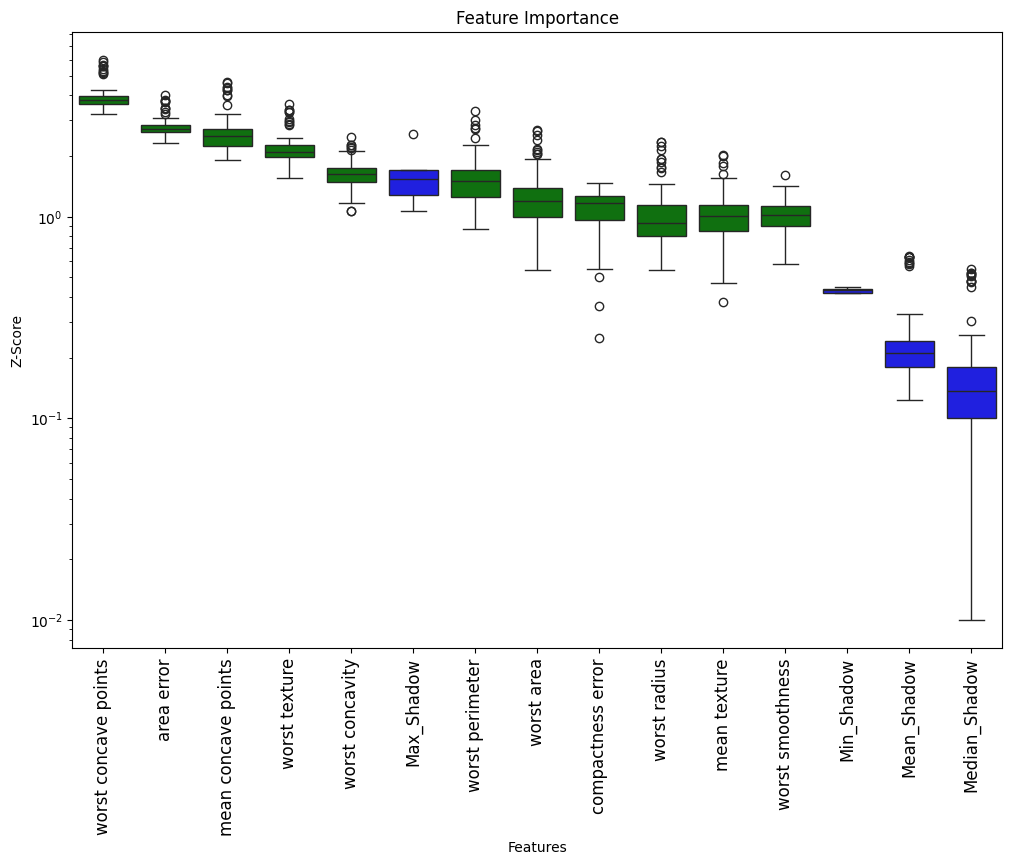

Type :  all


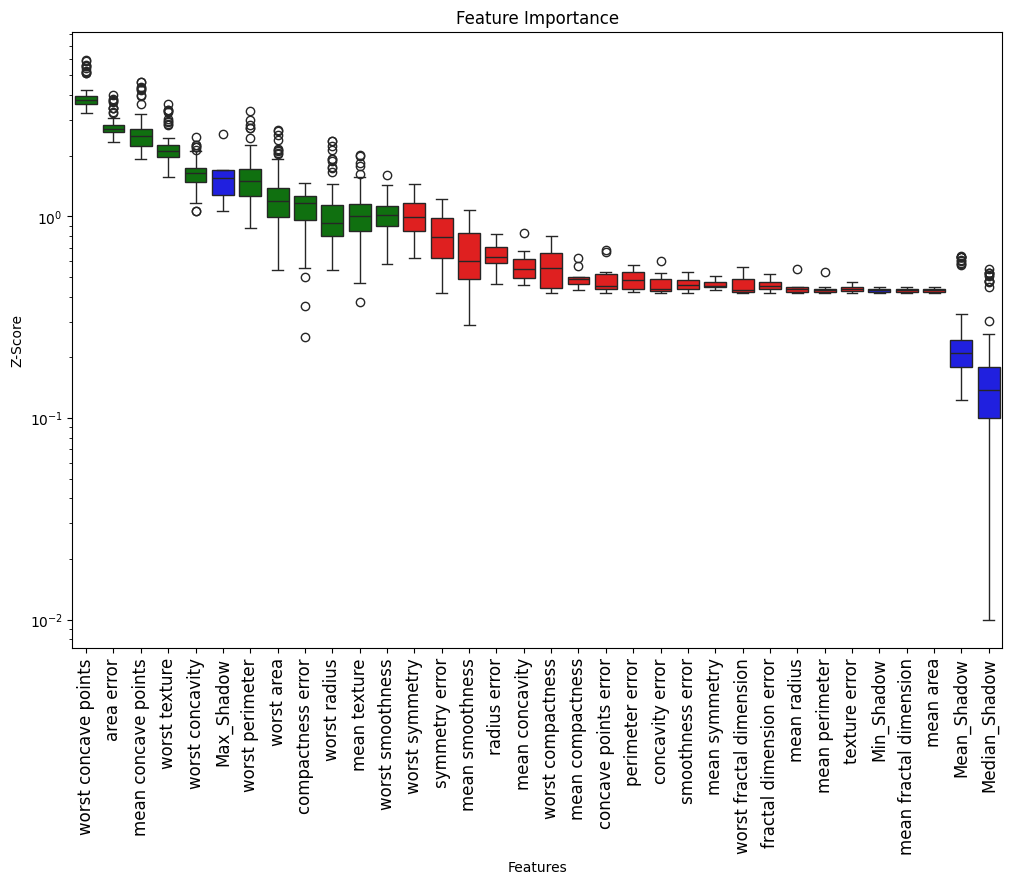

In [6]:
for _c in ['Tentative','Rejected','Accepted', 'all']:
    # Returns Boxplot of features
    print("Type : ", _c)
    Feature_Selector.plot(X_size=12, figsize=(12,8),
                y_scale='log', which_features=_c)